<a href="https://colab.research.google.com/github/Pragna235/ACM-Winter-School-Assignment-5/blob/main/Assignment_5_Unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K - Means Clustering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
!unzip archive.zip

Archive:  archive.zip
  inflating: class.csv               
  inflating: zoo.csv                 


In [4]:
zoo_data = pd.read_csv("/content/zoo.csv")
zoo_data

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [5]:
zoo_data.shape

(101, 18)

In [6]:
zoo_data.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')

In [7]:
zoo_data['class_type'].value_counts() # So, there are a total of 7 classes in the target variable

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

In [8]:
#zoo_data['animal_name'].value_counts()

In [ ]:
#zoo_data['animal_name'].value_counts().shape

(100,)

In [9]:
# Frequency Distribution of class_types
zoo_outcome = pd.crosstab(index=zoo_data["class_type"],  # Make a crosstab
                              columns="count")      # Name the count column
zoo_outcome

col_0,count
class_type,
1,41
2,20
3,5
4,13
5,4
6,8
7,10


In [10]:
zoo_type1 = zoo_data.loc[zoo_data['class_type'] == 1]
zoo_type2 = zoo_data.loc[zoo_data['class_type'] == 2]
zoo_type3 = zoo_data.loc[zoo_data['class_type'] == 3]
zoo_type4 = zoo_data.loc[zoo_data['class_type'] == 4]
zoo_type5 = zoo_data.loc[zoo_data['class_type'] == 5]
zoo_type6 = zoo_data.loc[zoo_data['class_type'] == 6]
zoo_type7 = zoo_data.loc[zoo_data['class_type'] == 7]

In [ ]:
zoo_type1

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1
10,cheetah,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
17,deer,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
19,dolphin,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1,1


In [ ]:
zoo_type1.shape

(41, 18)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packa

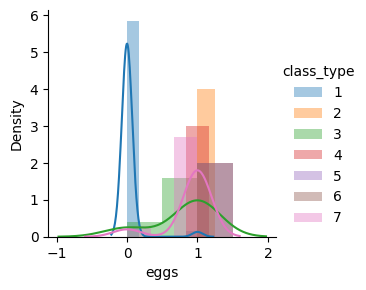

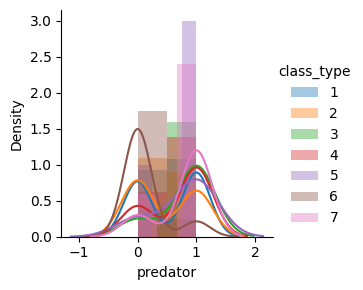

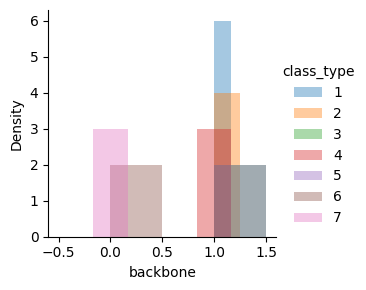

In [11]:
sns.FacetGrid(zoo_data, hue="class_type", height=3).map(sns.distplot, "eggs").add_legend()
sns.FacetGrid(zoo_data, hue="class_type", height=3).map(sns.distplot, "predator").add_legend()
sns.FacetGrid(zoo_data, hue="class_type", height=3).map(sns.distplot, "backbone").add_legend()
plt.show()

In [12]:
zoo_df = zoo_data.drop('animal_name',axis=1)
zoo_df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


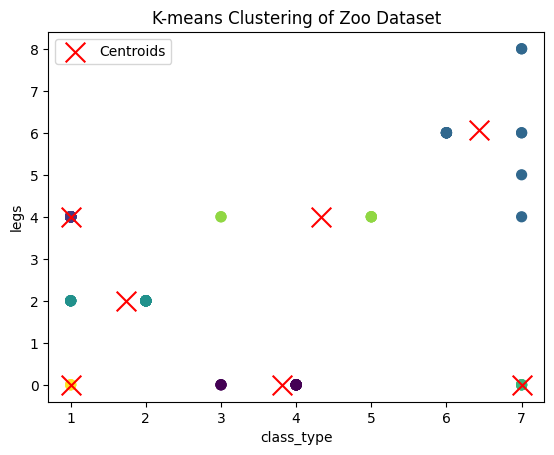

In [27]:

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load Zoo dataset
zoo_df = zoo_data.drop('animal_name',axis=1)

# Selecting features for clustering (petal length and petal width)
X = zoo_df[['class_type','legs']]

# Initializing KMeans with 7 clusters (as there are 7 types of class types)
kmeans = KMeans(n_clusters=7, random_state=42)

# Fit KMeans to the selected features
kmeans.fit(X)

# Getting the cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualizing the clusters along with the centroids
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.xlabel('class_type')
plt.ylabel('legs')
plt.title('K-means Clustering of Zoo Dataset')
plt.legend()
plt.show()

#This code snippet loads the Iris dataset, selects the 'petal length' and 'petal width' features, performs K-means clustering with three clusters (since there are three species of iris in the dataset), and visualizes the clusters along with their centroids. Adjust the number of clusters and features based on your requirements or explore different aspects of the dataset.

# DBScan

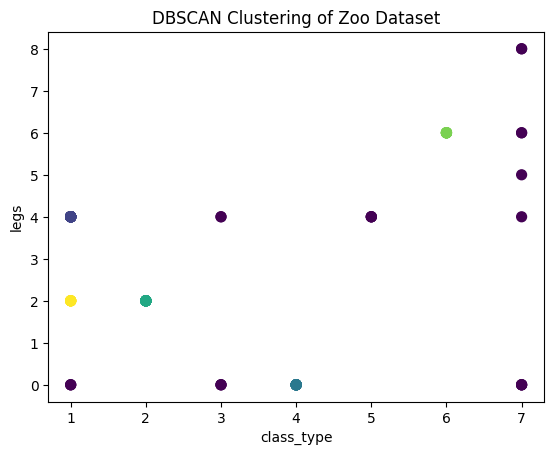

In [28]:

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load Iris dataset
zoo_df = zoo_data.drop('animal_name',axis=1)

# Selecting features for clustering (petal length and petal width)
X = zoo_df[['class_type','legs']]

# Initializing DBSCAN with epsilon=0.5 and minimum samples=5 (adjust these as needed)
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit DBSCAN to the selected features
dbscan.fit(X)

# Getting the cluster labels (-1 represents outliers, other integers represent different clusters)
labels = dbscan.labels_

# Visualizing the clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', s=50)
plt.xlabel('class_type')
plt.ylabel('legs')
plt.title('DBSCAN Clustering of Zoo Dataset')
plt.show()


# Heirarchial Clustering

In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

# Importa Packages
import numpy as np                # linear algebra
import pandas as pd               # data frames
import seaborn as sns             # visualizations
import matplotlib.pyplot as plt   # visualizations
import scipy.stats                # statistics
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage

In [16]:
#Primeros registros
print(zoo_data.head())
# No de observaciones y tipo de datos
print(zoo_data.info())
# Numero de Observaciones y Columnas
print(zoo_data.shape)

  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   class_type  
0           1  
1           1  
2           4  
3   

<ipython-input-17-2f43d84d894c>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(matcorr, dtype=np.bool)


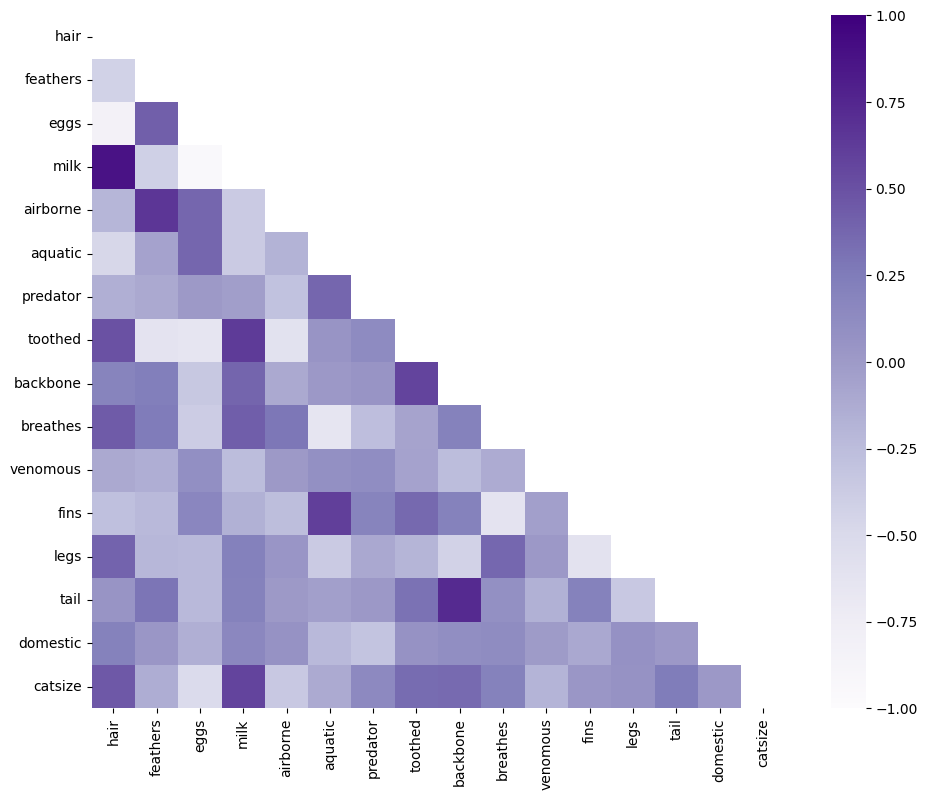

In [17]:
#Matriz de correlation
matcorr = zoo_data.iloc[:,~zoo_data.columns.isin(['animal_name','class_type'])].corr()
mask = np.zeros_like(matcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(matcorr, mask=mask, cmap="Purples", vmin=-1, vmax=1, center=0, square=True);
plt.show()

In [18]:
zoo_data.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')

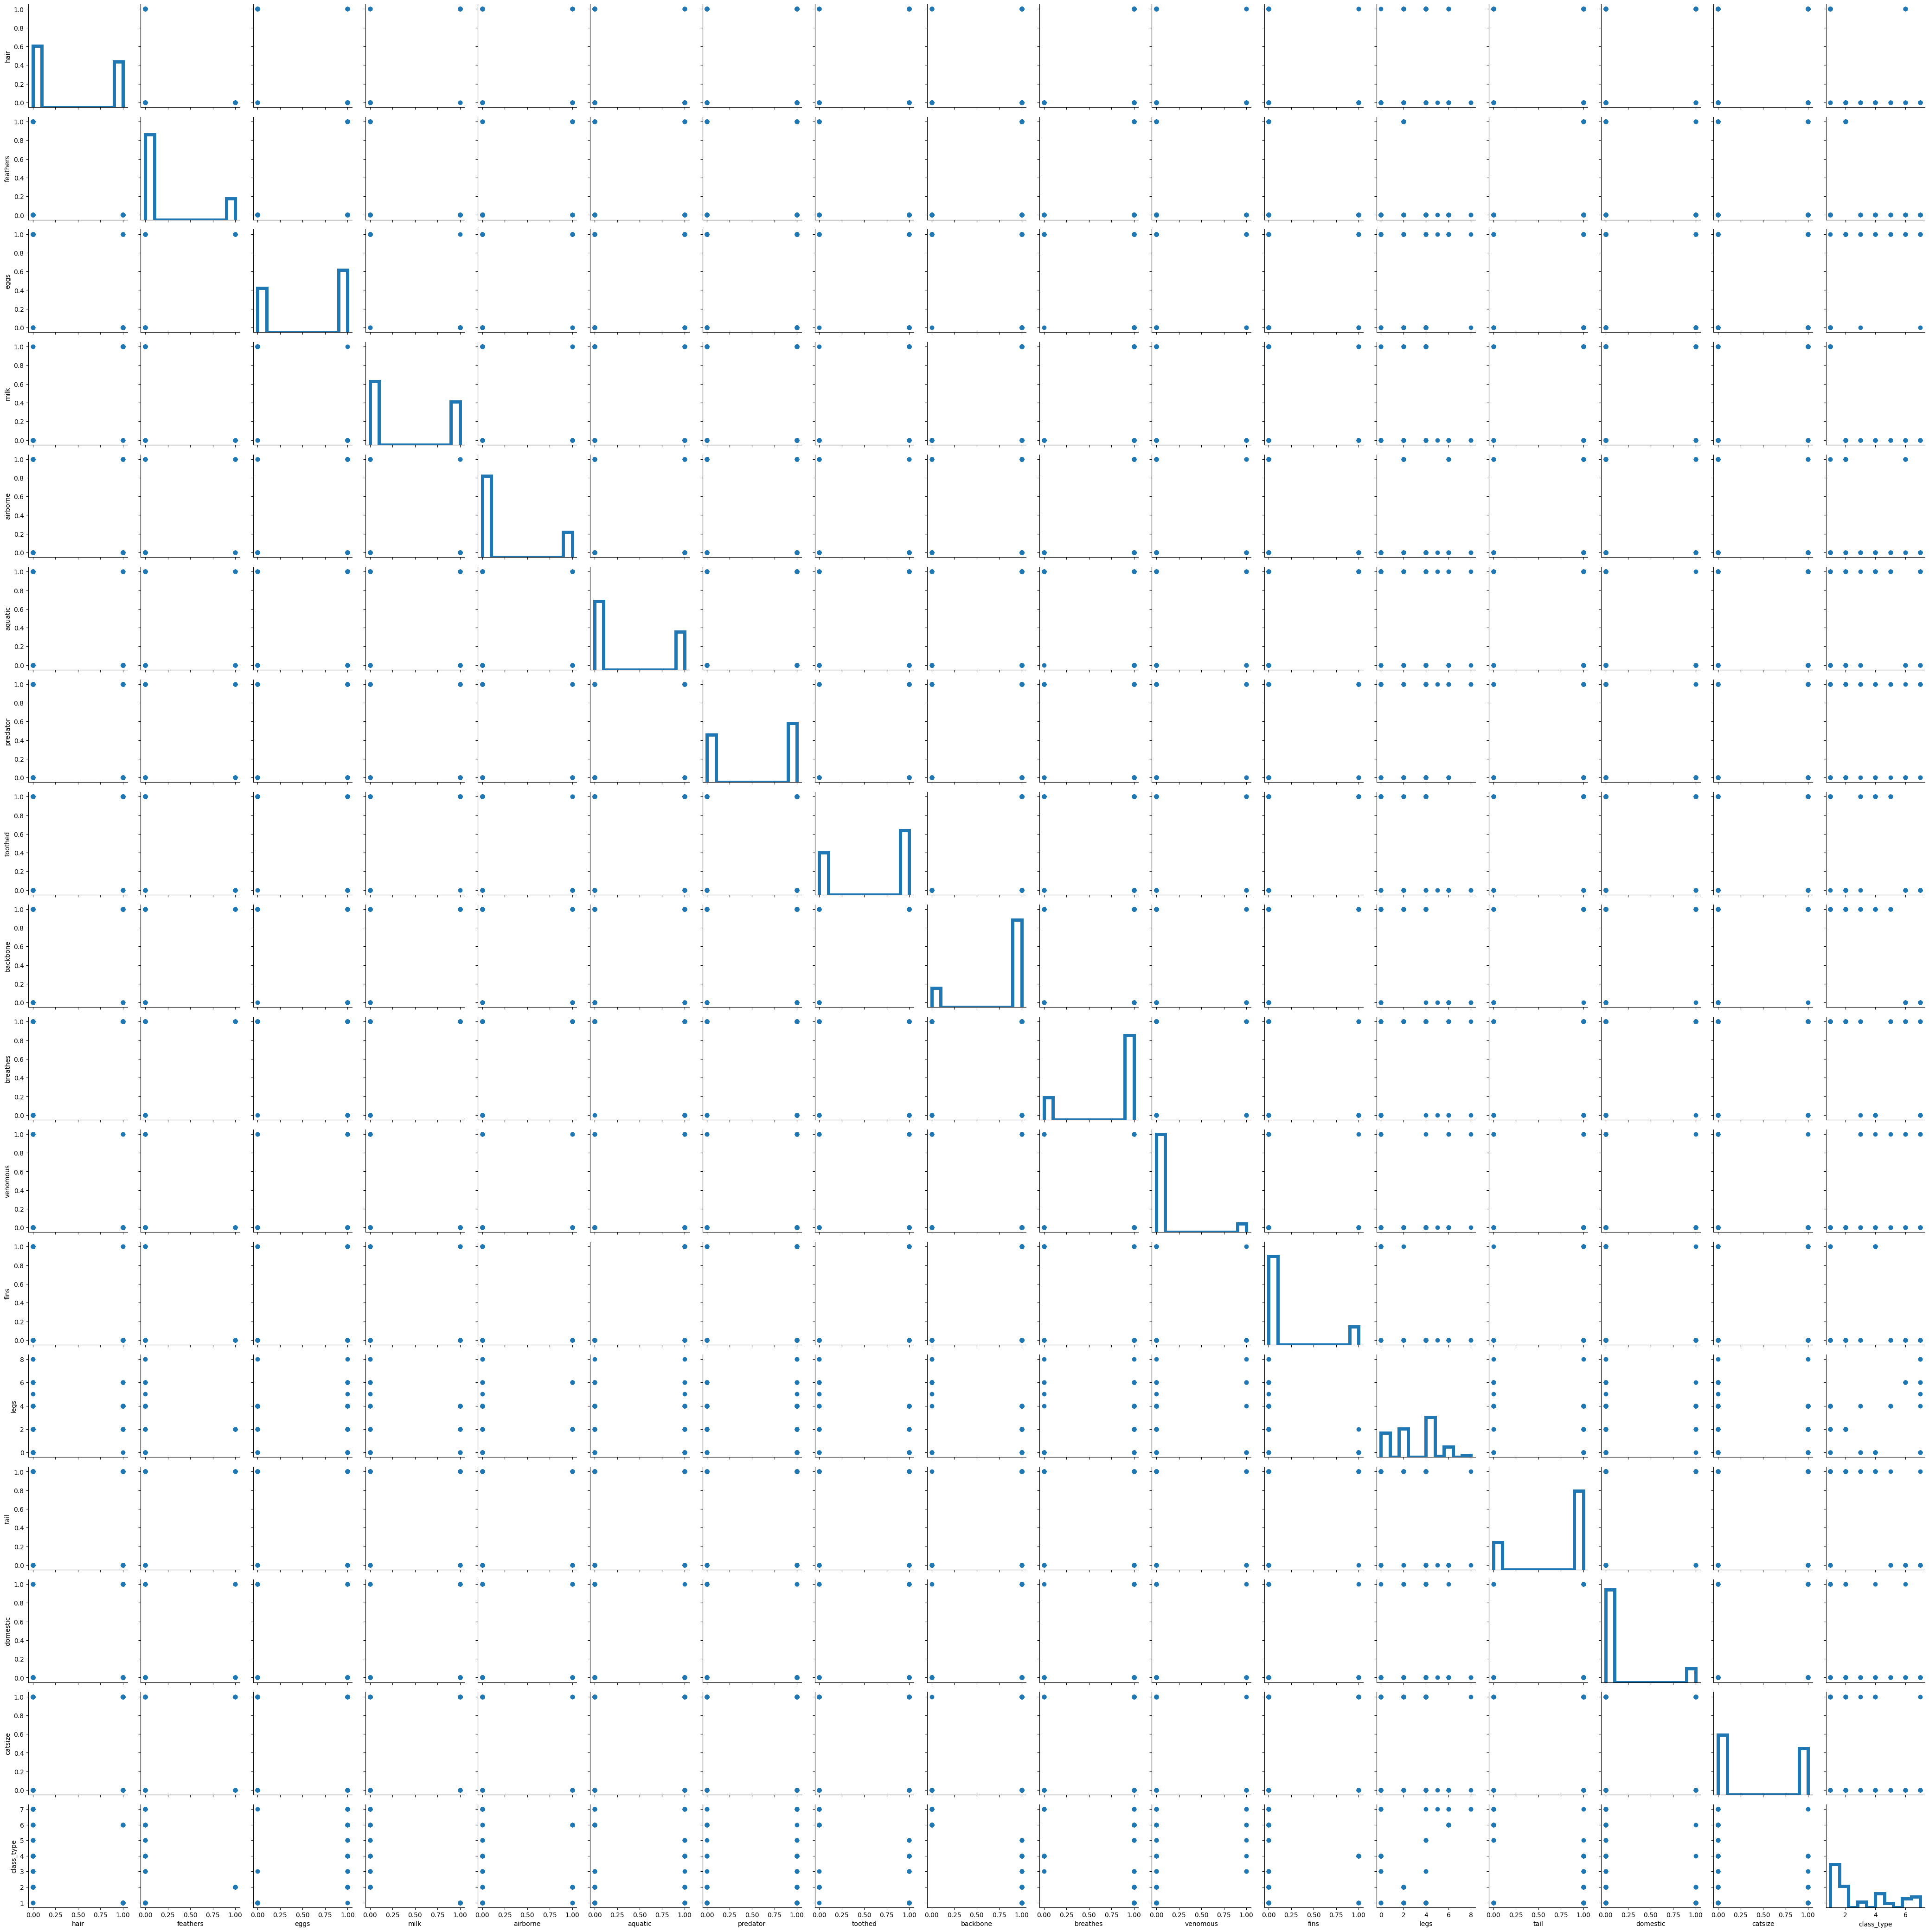

In [20]:
g = sns.PairGrid(zoo_data.loc[:,['hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type']])
g.map_diag(plt.hist, histtype="step", linewidth=5)
g.map_offdiag(plt.scatter)

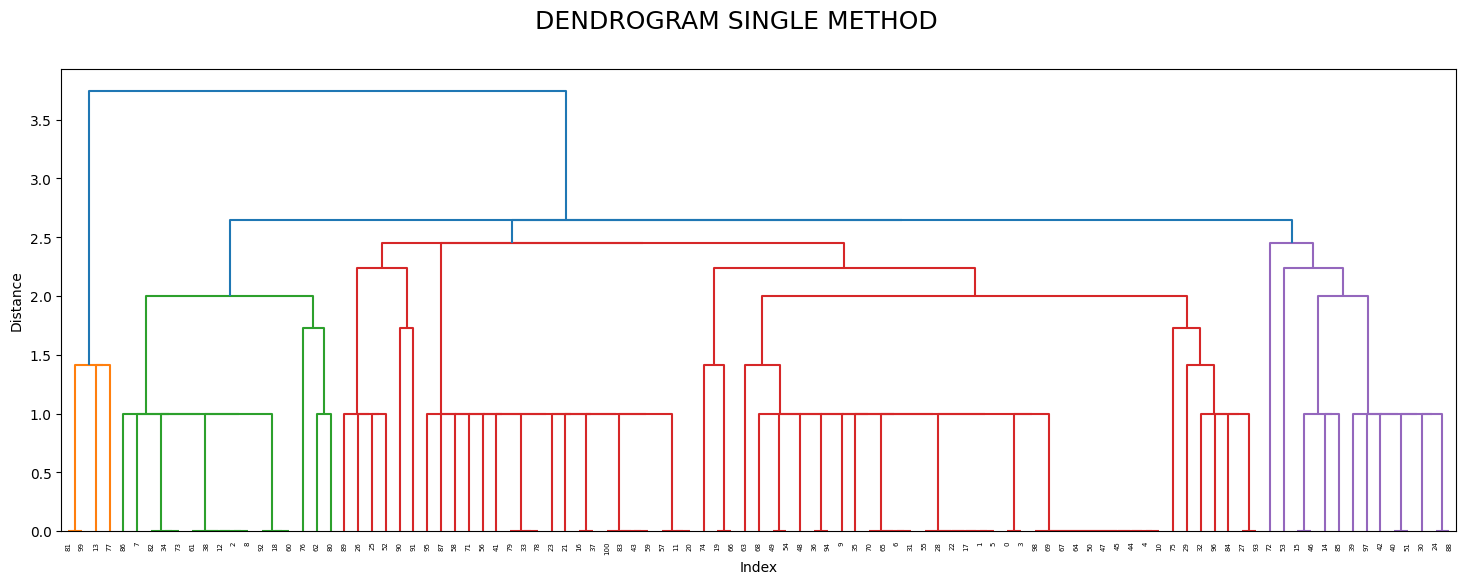

In [21]:
dist_sin = linkage(zoo_data.loc[:,['hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type']],method="single")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM SINGLE METHOD",fontsize=18)
plt.show()

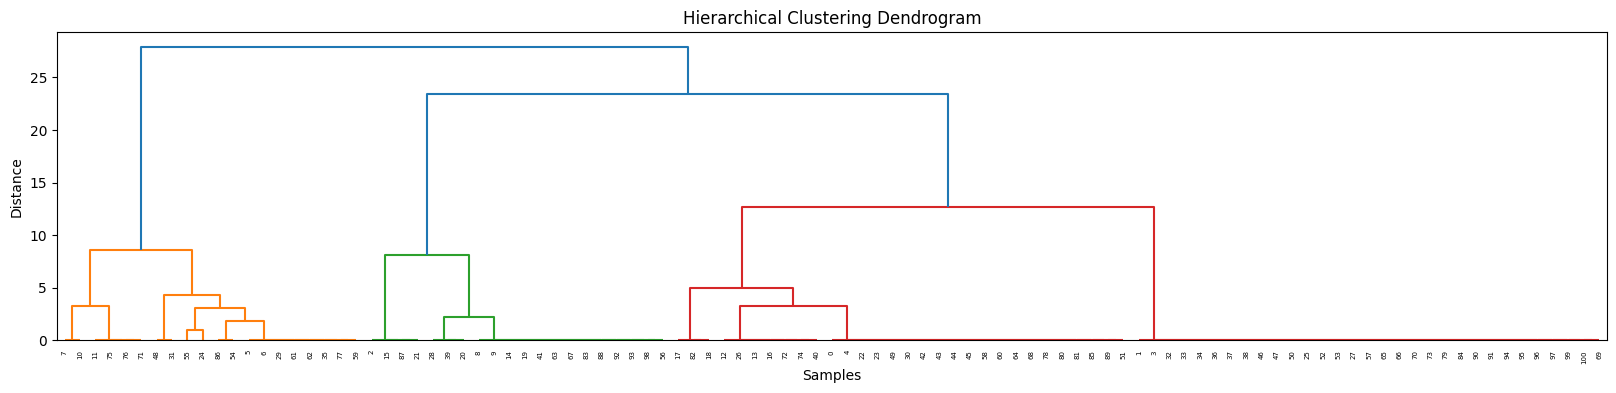

In [30]:

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# Load Iris dataset
zoo_df = zoo_data.drop('animal_name',axis=1)

# Selecting features for clustering (petal length and petal width)
X = zoo_df[['class_type', 'legs']]

# Initializing Hierarchical Agglomerative Clustering with linkage='ward' (other linkage options available)
agg_clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward')

# Fit the Hierarchical Agglomerative Clustering to the selected features
agg_clustering.fit(X)

# Getting the cluster labels
labels = agg_clustering.labels_

# Calculate the linkage matrix
from scipy.cluster import hierarchy
Z = hierarchy.linkage(X, method='ward')

# Plotting dendrogram
def plot_dendrogram(Z, **kwargs):
    plt.figure(figsize=(20,4))
    dendrogram(Z, labels=labels, count_sort='ascending', distance_sort='ascending', show_leaf_counts=True, **kwargs)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Samples')
    plt.ylabel('Distance')

plot_dendrogram(Z)
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


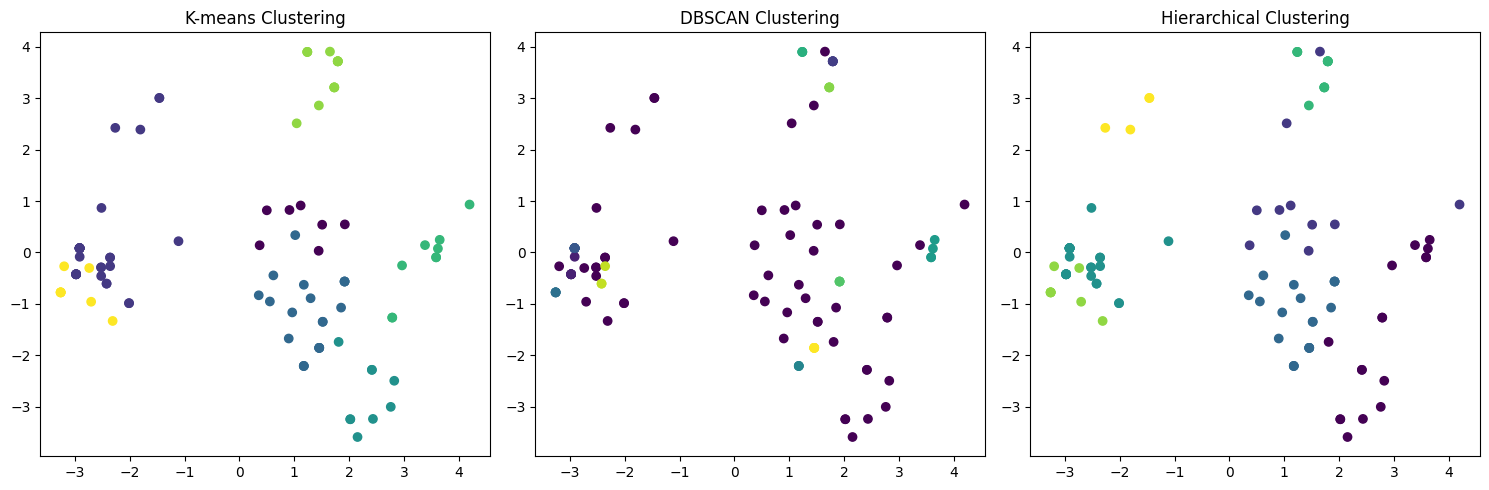

In [31]:

import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the zoo dataset (you may need to adjust the path to your dataset)
zoo_data = pd.read_csv('/content/zoo.csv')

# Drop the animal name column for clustering
zoo_df = zoo_data.drop('animal_name',axis=1)

# Standardize the data
scaler = StandardScaler()
zoo_scaled = scaler.fit_transform(zoo_df)

# K-means clustering
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans_labels = kmeans.fit_predict(zoo_scaled)

# DBSCAN clustering
dbscan = DBSCAN(eps=1, min_samples=3)
dbscan_labels = dbscan.fit_predict(zoo_scaled)

# Hierarchical Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=7)
hierarchical_labels = hierarchical.fit_predict(zoo_scaled)

# Visualization - PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
animals_pca = pca.fit_transform(zoo_scaled)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.scatter(animals_pca[:, 0], animals_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-means Clustering')

plt.subplot(132)
plt.scatter(animals_pca[:, 0], animals_pca[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')

plt.subplot(133)
plt.scatter(animals_pca[:, 0], animals_pca[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering')

plt.tight_layout()
plt.show()
